In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv(r'C:\Users\HP\Downloads\online_retail.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [5]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1048570,580501,23284,DOORMAT KEEP CALM AND COME IN,2,04-12-2011 13:00,8.25,14546.0,United Kingdom
1048571,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,04-12-2011 13:00,4.95,14546.0,United Kingdom
1048572,580502,22469,HEART OF WICKER SMALL,3,04-12-2011 13:15,1.65,16931.0,United Kingdom
1048573,580502,23489,VINTAGE BELLS GARLAND,2,04-12-2011 13:15,2.89,16931.0,United Kingdom
1048574,580502,23046,PAPER LANTERN 9 POINT DELUXE STAR,1,04-12-2011 13:15,6.65,16931.0,United Kingdom


In [7]:
df.sample(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
746304,556231,85123A,?,4000,09-06-2011 15:04,0.00,NaN,United Kingdom
643032,546391,21380,WOODEN HAPPY BIRTHDAY GARLAND,4,11-03-2011 14:06,2.95,17800.0,United Kingdom
439307,531361,22118,JOY WOODEN BLOCK LETTERS,3,07-11-2010 14:26,4.95,12820.0,United Kingdom
161691,504860,21928,JUMBO BAG SCANDINAVIAN PAISLEY,10,18-04-2010 12:04,1.95,12402.0,Belgium


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [9]:
df.describe()

,Quantity,Price,Customer ID
count,1.048575e+06,1.048575e+06,811893.000000
mean,9.957525e+00,4.627346e+00,15324.712265
std,1.335187e+02,1.228024e+02,1697.033034
min,-7.421500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13971.000000
50%,3.000000e+00,2.100000e+00,15260.000000
75%,1.000000e+01,4.150000e+00,16795.000000
max,7.421500e+04,3.897000e+04,18287.000000


In [10]:
df.shape

(1048575, 8)

In [11]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236682
Country             0
dtype: int64

In [12]:
df.corr()

,Quantity,Price,Customer ID
Quantity,1.000000,-0.001707,-0.007432
Price,-0.001707,1.000000,-0.003787
Customer ID,-0.007432,-0.003787,1.000000


In [13]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [14]:
df = df.drop('Description', axis = 1)

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
df.nunique()

Invoice        52961
StockCode       5304
Quantity        1048
InvoiceDate    47046
Price           2784
Customer ID     5924
Country           43
dtype: int64

In [17]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

In [18]:
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009


In [19]:
Sales = df.loc[df['Quantity'] > 0 & ~(df['Invoice'].str.contains('C'))]

In [20]:
Sales.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009


In [21]:
Sales.shape

(1025878, 8)

In [22]:
Sales_New = Sales.copy()

In [23]:
Sales_New['Revenue'] = Sales_New['Quantity'] * Sales_New['Price']

In [24]:
Sales_New.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


In [25]:
Sales_Mean = Sales_New.groupby('Year').mean()['Revenue']

In [26]:
Sales_Mean.head()

Year
2009    18.713273
2010    19.909680
2011    19.747694
Name: Revenue, dtype: float64

In [27]:
Sales_Mean = Sales_Mean.reset_index()

In [28]:
Sales_Mean.head()

,Year,Revenue
0,2009,18.713273
1,2010,19.909680
2,2011,19.747694


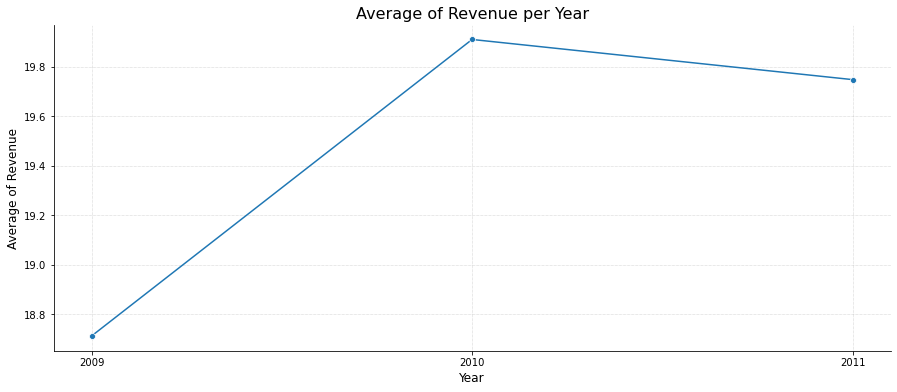

In [29]:
plt.figure(figsize=(15,6))
sns.lineplot(Sales_Mean['Year'], Sales_Mean['Revenue'], marker='o')
plt.title('Average of Revenue per Year', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average of Revenue', fontsize = 12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [30]:
Sales_Finish = Sales_New[Sales_New['Customer ID'].notna()]

In [31]:
Sales_Finish.count()


Invoice        793380
StockCode      793380
Quantity       793380
InvoiceDate    793380
Price          793380
Customer ID    793380
Country        793380
Year           793380
Revenue        793380
dtype: int64

In [33]:
Purchase_Canceled = df[df['Invoice'].str.contains('C')]

In [34]:
Purchase_Canceled.count()

Invoice        19261
StockCode      19261
Quantity       19261
InvoiceDate    19261
Price          19261
Customer ID    18513
Country        19261
Year           19261
dtype: int64

In [35]:
Count_Finished = Sales_Finish.groupby('Year').count()['Invoice'].reset_index()
Count_Finished

,Year,Invoice
0,2009,30761
1,2010,403094
2,2011,359525


In [36]:
Count_Canceled = Purchase_Canceled.groupby('Year').count()['Invoice'].reset_index()
Count_Canceled

,Year,Invoice
0,2009,1015
1,2010,9919
2,2011,8327


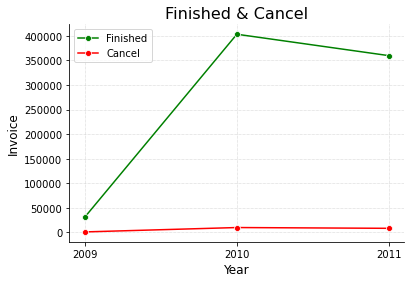

In [37]:
sns.lineplot(Count_Finished['Year'], Count_Finished['Invoice'],
marker = 'o', color = 'green', label = 'Finished')
sns.lineplot(Count_Canceled['Year'], Count_Canceled['Invoice'],
marker = 'o', color = 'red', label = 'Cancel')
plt.title('Finished & Cancel', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Invoice', fontsize = 12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.legend()
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [38]:
Cancellation_Rate = Count_Canceled['Invoice'] / df['Invoice'].count() * 100
Cancellation = Count_Canceled.assign(Cancellation_Rate=Count_Canceled['Invoice'] / df['Invoice'].count() * 100)
Cancellation[['Year', 'Cancellation_Rate']]


,Year,Cancellation_Rate
0,2009,0.096798
1,2010,0.945950
2,2011,0.794125


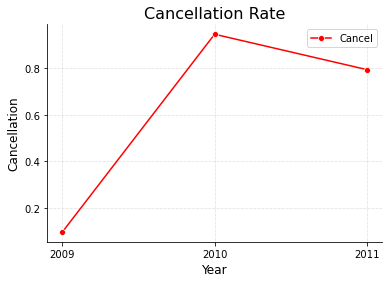

In [39]:
sns.lineplot(Cancellation['Year'], Cancellation['Cancellation_Rate'],
marker = 'o', color = 'red', label = 'Cancel')
plt.title('Cancellation Rate', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cancellation', fontsize = 12)
plt.grid(color='darkgrey', linestyle=':', linewidth=0.5)
plt.legend()
plt.gca().set_xticks([2009, 2010, 2011])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [40]:
Comparison = Cancellation
Comparison['Total_Finished'] = Count_Finished['Invoice']
Comparison['Total_Canceled'] = Comparison['Invoice']
Comparison[['Year', 'Total_Finished', 'Total_Canceled', 'Cancellation_Rate']]

,Year,Total_Finished,Total_Canceled,Cancellation_Rate
0,2009,30761,1015,0.096798
1,2010,403094,9919,0.945950
2,2011,359525,8327,0.794125


# THANK YOU